# **Rani Son**

## Firstly, I want to import some libraries that I will need for Analysis

In [158]:
import pandas as pd
import numpy as np
from tabulate import tabulate

## **Then, after importing the alcohol database, I want a view of it.**

In [159]:
url = "https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv"
alcohol_df = pd.read_csv(url, sep=",")

In [160]:
alcohol_df

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
...,...,...,...
3340,White,High,High
3341,White,High,Low
3342,White,High,Low
3343,White,High,Low


## **Before doing any testing, I want to check for any missing values and inpute if nesscessary.**

In [161]:
alcohol_df.Type.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
3340    False
3341    False
3342    False
3343    False
3344    False
Name: Type, Length: 3345, dtype: bool>

## **After checking there appears to be no missing values, but I will also check each column individually to double check.**

In [162]:
alcohol_df.Alcohol_flag.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
3340    False
3341    False
3342    False
3343    False
3344    False
Name: Alcohol_flag, Length: 3345, dtype: bool>

In [163]:
alcohol_df.Sugar_flag.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
3340    False
3341    False
3342    False
3343    False
3344    False
Name: Sugar_flag, Length: 3345, dtype: bool>

## **Again, there were no missing values, so I can now move on to encoding all categoric data and creating contingency tables.**

In [164]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

encoded_alcoholDF = pd.DataFrame()

for i in range(0, alcohol_df.shape[1]):
    if alcohol_df.dtypes[i]=='object' or alcohol_df.dtypes[i]=='bool':
        encoded_alcoholDF[alcohol_df.columns[i]] = le.fit_transform(alcohol_df[alcohol_df.columns[i]])



print("-=========================")
print(alcohol_df)
print("-=========================")
encoded_alcoholDF

-=========================
       Type Alcohol_flag Sugar_flag
0       Red         High       High
1       Red         High        Low
2       Red          Low       High
3       Red         High        Low
4       Red          Low        Low
...     ...          ...        ...
3340  White         High       High
3341  White         High        Low
3342  White         High        Low
3343  White         High        Low
3344  White         High        Low

[3345 rows x 3 columns]
-=========================


,Type,Alcohol_flag,Sugar_flag
0,0,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,1
...,...,...,...
3340,1,0,0
3341,1,0,1
3342,1,0,1
3343,1,0,1


## **Here is the Contingency Table of Type Vs. Alcohol content**

In [165]:
alcoholdf_crosstab = pd.crosstab(alcohol_df['Type'], alcohol_df['Alcohol_flag'], margins = 1)
print(alcoholdf_crosstab)

Alcohol_flag  High   Low   All
Type                          
Red            485   600  1085
White         1176  1084  2260
All           1661  1684  3345


## **This is the graph of Type Vs. Alcohol Content**

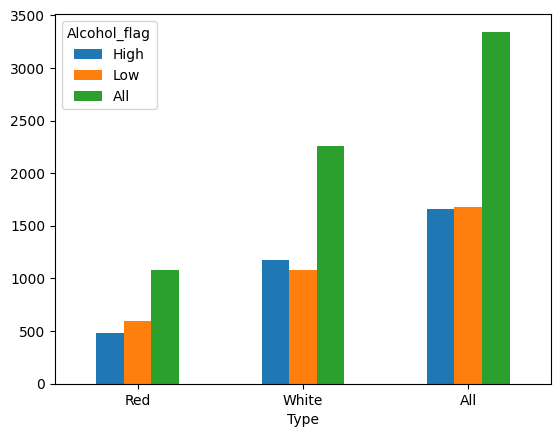

In [166]:
barplot = alcoholdf_crosstab.plot.bar(rot=0)

## **Here is the Contingency Table of Type Vs. Sugar content**

In [167]:
alcoholdf_crosstab = pd.crosstab(alcohol_df['Type'], alcohol_df['Sugar_flag'], margins = 1)
print(alcoholdf_crosstab)

Sugar_flag  High   Low   All
Type                        
Red          237   848  1085
White       1382   878  2260
All         1619  1726  3345


## **This is the graph of Type Vs. Sugar Content**

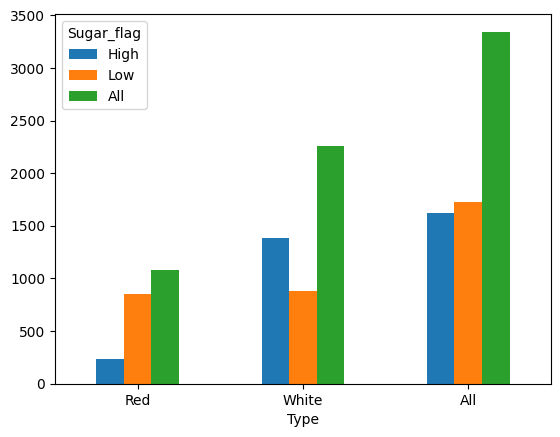

In [168]:
barplot = alcoholdf_crosstab.plot.bar(rot=0)

## ***Probability of Red and White***

## From the crosstabs, I can see that the total amounts of red, white, and total overall. So to get probabilities of Red and White, I just have to divide each total by the total overall.

## **P(Red) = (1085 / 3345) = 32.4%**


## **P(White) = (2260 / 3345) or 100 - P(Red)**
## **P(White) = 67.6%**

## ***Probability of High and Low Alcohol Content***

## Simliar to the probailities of Red and White, we can do the same calculations to find High and Low Alcohol Content

## **P(High Alcohol) = (1661 / 3345) = 49.7%**

## **P(Low Alcohol) = (1684 / 3345) or 100 - P(High Alcohol)**
## **P(Low Alcohol) = 50.3%**

## ***Probability of High and Low Sugar Content***

## Again, I will do a calculation similar to finding Probability of Red and White

## **P(High Sugar) = (1619 / 3345) = 48.4%**

## **P(Low Sugar) = (1726 / 3345) or 100 - P(High Sugar)**
## **P(Low Sugar) = 51.6%**

# ***Conditional Probabilitites of Alcohol_flag and Type***

# **p(Alcohol_flag = High ∣ Type = Red)**

## **p(Alcohol_flag = High ∣ Type = Red) = p(Type = Red And Alcohol_flag = High) / p(Type = Red)**
## **p(Alcohol_flag = High ∣ Type = Red) = p(Type = Red * Alcohol_flag = High) * p(Alcohol_flag = High) / p(Type = Red)**
## **p(Alcohol_flag = High ∣ Type = Red) = (32.4% * 49.7%) * (49.7%) / (32.4%)**
## **p(Alcohol_flag = High ∣ Type = Red) = 24.7%**

# **p(Alcohol_flag = Low ∣ Type = Red)**

## **p(Alcohol_flag = Low ∣ Type = Red) = p(Alcohol_flag = Low And Type = Red) * p(Type = Red) / p(Type = Red)**
## **p(Alcohol_flag = Low ∣ Type = Red) = p(Type = Red * Alcohol_flag = Low) * p(Alcohol_flag = Low) / p(Type = Red)**
## **p(Alcohol_flag = Low ∣ Type = Red) = (32.4% * 50.3%) * (50.3%) / (32.4%)**
## **p(Alcohol_flag = Low ∣ Type = Red) = 25.3%**

# ***Conditional probabilities of Sugar_flag and Type***

# **p(Sugar_flag = High ∣ Type = Red)**

## **p(Sugar_flag = High ∣ Type = Red) = p(Sugar_flag = High And Type = Red) / p(Type = Red)**
## **p(Sugar_flag = High ∣ Type = Red) = p(Type = Red * Sugar_flag = High) * p(Sugar_flag = High) / p(Type = Red)**
## **p(Sugar_flag = High ∣ Type = Red) = (32.4% * 48.4%) * (48.4%) / (32.4%)**
## **p(Sugar_flag = High ∣ Type = Red) = 23.4%**

# **p(Sugar_flag = Low ∣ Type = Red)**

## **p(Sugar_flag = Low ∣ Type = Red) = p(Sugar_flag = Low And Type = Red) / p(Type = Red)**
## **p(Sugar_flag = Low ∣ Type = Red) = p(Type = Red * Sugar_flag = Low) * p(Sugar_flag = Low) / p(Type = Red)**
## **p(Sugar_flag = Low ∣ Type = Red) = (32.4% * 51.6%) * (51.6%)/ (32.4%)**
## **p(Sugar_flag = Low ∣ Type = Red) = 26.6%**

## **NB Classifiers**

## *Train = 80% Vs. Test = 20%*

In [169]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB
from sklearn.model_selection import train_test_split

NBmodel = GaussianNB()


X = encoded_alcoholDF.iloc[:,1:3]
y = encoded_alcoholDF.iloc[:,0]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.20, stratify=y)

print(X_train)
print(X_test)


      Alcohol_flag  Sugar_flag
2688             0           1
1824             1           0
2483             0           0
935              1           1
2017             1           0
...            ...         ...
2650             0           1
2246             1           1
3001             0           1
11               1           1
2854             0           1

[2676 rows x 2 columns]
      Alcohol_flag  Sugar_flag
288              0           1
3047             0           1
2197             1           1
3132             0           0
682              1           0
...            ...         ...
864              0           1
2505             0           0
232              1           1
2467             0           0
2634             0           0

[669 rows x 2 columns]


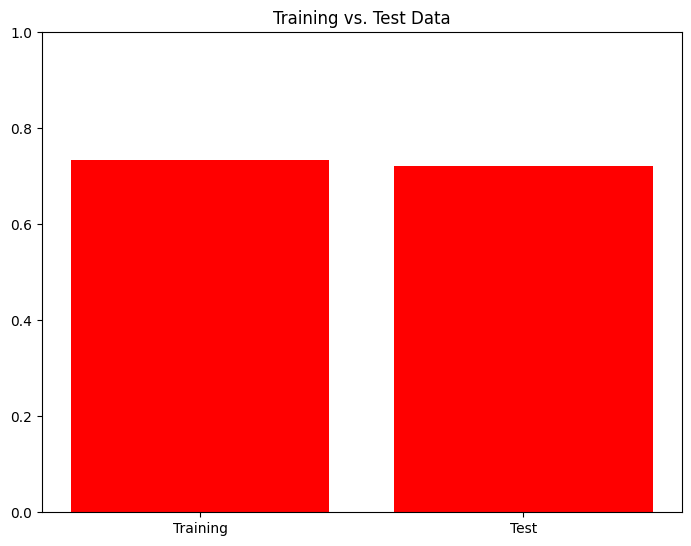

In [170]:
import matplotlib.pyplot as plt

NBmodel.fit(X_train, y_train)

labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Training vs. Test Data')
ax.bar(labels, scores, color="red")
ax.set_ylim(0, 1)
plt.show()





## *Train = 75% Vs. Test = 25%*

In [171]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.25, stratify=y)

print(X_train)
print(X_test)


      Alcohol_flag  Sugar_flag
1184             1           0
2433             1           0
2765             0           1
2217             1           1
1555             0           0
...            ...         ...
2017             1           0
3106             0           1
2428             1           0
11               1           1
2343             1           1

[2508 rows x 2 columns]
      Alcohol_flag  Sugar_flag
2253             1           0
2797             0           0
1005             1           1
3264             0           0
463              1           1
...            ...         ...
540              0           0
855              0           1
1862             1           0
1619             1           0
1719             1           0

[837 rows x 2 columns]


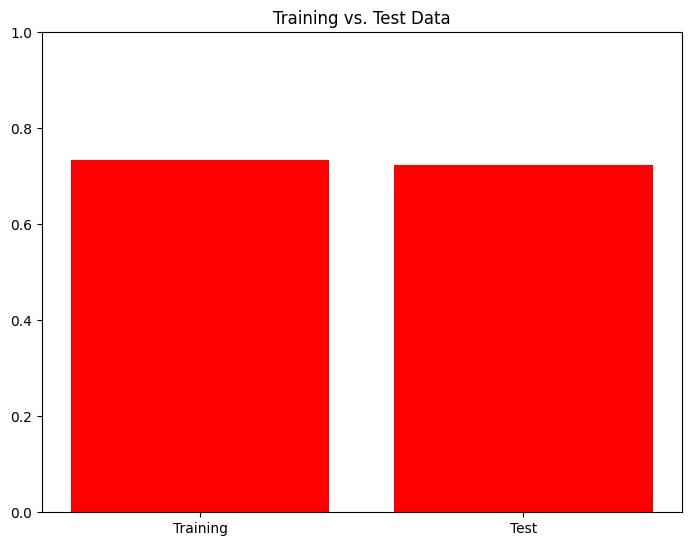

In [172]:
NBmodel.fit(X_train, y_train)

labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Training vs. Test Data')
ax.bar(labels, scores, color="red")
ax.set_ylim(0, 1)
plt.show()

## *Train = 70% Vs. Test = 30%*

In [173]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.30, stratify=y)

print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
1768             1           0
1792             1           1
413              1           0
1610             1           0
1671             1           0
...            ...         ...
522              1           0
893              1           0
1924             1           1
11               1           1
1868             1           1

[2341 rows x 2 columns]
      Alcohol_flag  Sugar_flag
1389             0           0
1899             1           0
162              1           1
1889             1           0
2982             0           0
...            ...         ...
941              0           0
3223             0           0
3219             0           1
2221             1           0
205              0           0

[1004 rows x 2 columns]


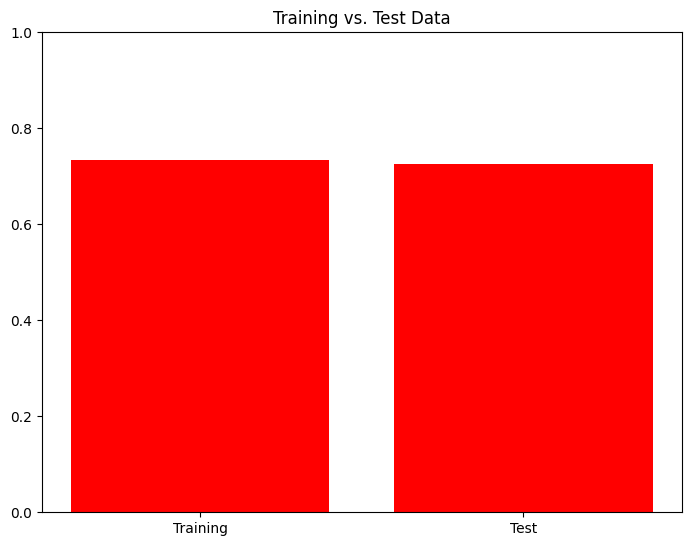

In [174]:
NBmodel.fit(X_train, y_train)

labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Training vs. Test Data')
ax.bar(labels, scores, color="red")
ax.set_ylim(0, 1)
plt.show()

## *Train = 60% Vs. Test = 40%*

In [175]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.40, stratify=y)

print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
3188             0           1
1192             1           0
1152             1           1
1741             1           0
1308             1           1
...            ...         ...
3203             0           1
1129             1           1
11               1           1
2226             1           0
2437             0           1

[2007 rows x 2 columns]
      Alcohol_flag  Sugar_flag
1326             0           1
520              1           1
443              0           1
1721             1           1
2826             0           1
...            ...         ...
744              1           0
3184             0           1
1430             0           1
2986             0           0
1062             1           1

[1338 rows x 2 columns]


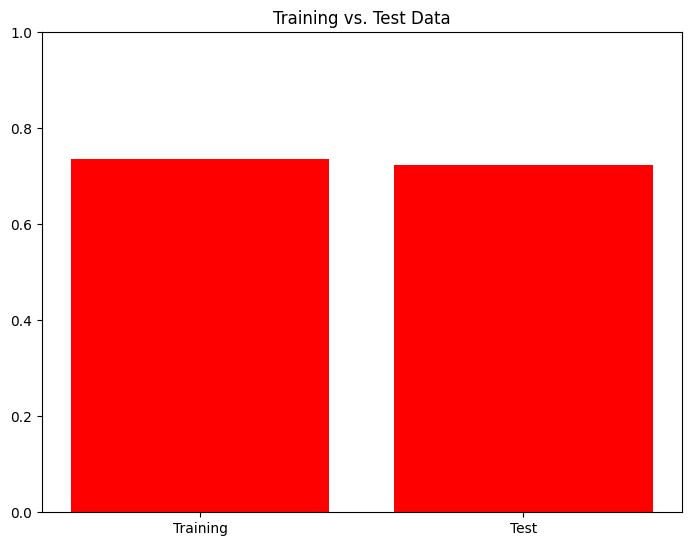

In [176]:
NBmodel.fit(X_train, y_train)

labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Training vs. Test Data')
ax.bar(labels, scores, color="red")
ax.set_ylim(0, 1)
plt.show()

## *Train = 50% Vs. Test = 50%*

In [177]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.50, stratify=y)

print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
1097             1           1
3003             0           0
1341             0           0
1685             1           0
708              0           0
...            ...         ...
1803             1           1
3297             0           0
1129             1           1
580              0           1
770              1           1

[1672 rows x 2 columns]
      Alcohol_flag  Sugar_flag
348              0           1
1435             0           0
1475             0           0
3212             0           0
1269             1           1
...            ...         ...
2899             0           1
2773             0           1
2584             0           0
1219             1           1
621              0           0

[1673 rows x 2 columns]


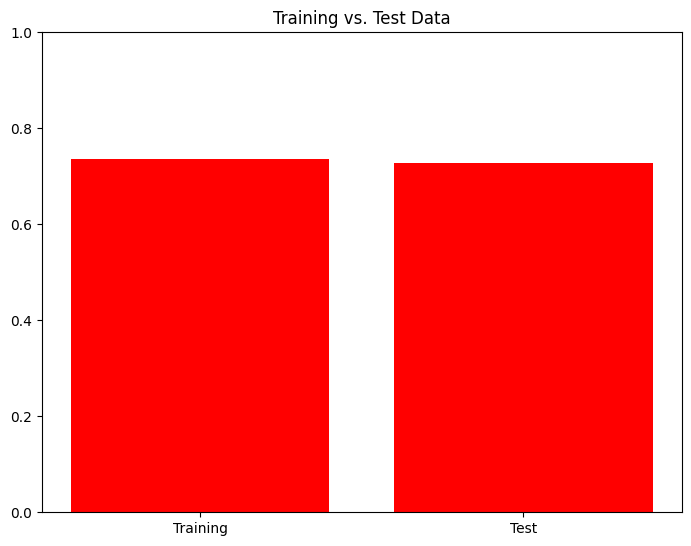

In [178]:
NBmodel.fit(X_train, y_train)

labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Training vs. Test Data')
ax.bar(labels, scores, color="red")
ax.set_ylim(0, 1)
plt.show()

## ***Conclusions***

## **After making the contingency tables, I conducted several probabilities**

## **1. p(White) = 67.6%**
## **2. p(Red) = 32.4%**

## **3. p(High Alcohol) = 49.7%**
## **4. p(Low Alcohol) = 50.3%**


## **5. p(High Sugar) = 48.4%**
## **6. p(Low Sugar) = 51.6%**


## **Then, I conducted several conditional Probabilities**

## **1. p(High Alcohol ∣ Red) = 24.7%**
## **2. p(Low Alcohol ∣ Red) = 25.3%**

## **3. p(High Sugar ∣ Red) = 23.4%**
## **4. p(Low Sugar ∣ Red) = 26.6%**

## **Lastly, although it is very slightly, I see that as I increase the test size of the NB model, the graph shows the tests getting slowly closer to the training.**